# Tutorial: Image Segmentation of Satellite Imagery
### *GRAD-E1394 Deep Learning -- Assignment 3*

Authors:
*   Gabriel da Silva Zech, [g.dasilvazech@students.hertie-school.org](g.dasilvazech@students.hertie-school.org)
*   Julian Kath, [j.kath@students.hertie-school.org](j.kath@students.hertie-school.org)
*   Krishnamoorthy Manohara, [k.manohara@students.hertie-school.org](k.manohara@students.hertie-school.org)
*   Florian Winkler, [f.winkler@students.hertie-school.org](f.winkler@students.hertie-school.org)
*   Nassim Zoueini, [n.zoueini@students.hertie-school.org](n.zoueini@students.hertie-school.org)

This tutorial provides an end-to-end workflow of image segmentation based on satellite images. It introduces a U-net convolutional neural network approach to segmenting buildings from satellite imagery as a specific application of deep learning in a public policy context. Built in a PyTorch environment, the tutorial provides users step-by-step explanations of image segmentation and an example of reproducible, working code in a self-contained notebook. Users will benefit from a structured and practical overview of how to collect and pre-process satellite image data, how to create a custom dataset that annotates satellite images using building footprints, and how to train and fine-tune an image segmentation model on aerial imagery. The tutorial can be extended to further projects that involve a similar approach to satellite image segmentation, such as segmenting roads or crop fields.

# Table of Contents


*   [Memo](#memo)
*   [Overview](#overview)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Data Description](#data-description)
*   [Model Training and Testing](#modeltraintest)
*   [Results & Discussion](#results-and-discussion)
*   [References](#references)


# General Guidelines
*(Please remove this and other guideline sections from your final tutorial submission.)*

This template should help you create your tutorial. You may introduce modifications and extensions but adhere to the general principles for writing the tutorial:

*   Be brief. 
    *  Keep it short and simple. Avoid unnecessary complexity.
*   Clearly illustrate how the content relates to public policy. 
    *  Identify the ways in which this tutorial would help the users (your collegues) in their work.
*   Provide enough context.
    *  Explain important concepts directly in the tutorial notebook, but feel free to direct users to external resources when necessary.  
*   Avoid or minimize the use of jargon. 
    *  Ideally, the content can be understood by both an ML audience and by people who are relatively new to ML and deep learning.
*   Focus on readability and usability. 
    *  Interleave code cells with explanatory text, keeping your audience in mind.
*   Follow guidelines to avoid plagiarism. 
    * Any verbatim text needs to be put in quotation marks. 
    * Do not copy code.
    * Clearly reference ideas and work of others.
    * [Hertie School Code of Conduct](https://hertieschool-f4e6.kxcdn.com/fileadmin/5_WhoWeAre/Code_of_Conduct.pdf)
* Ensure reproducibility.
    * Ensure that your notebook can be rerun by somebody else on a different machine in a reasonable amount of time. If the task is computationally expensive, provide an additional, smaller data sample for fast reproduction, and use that in your tutorial. 

## Additional Instructions
We highly recommend that you follow the [Ten simple rules for writing and sharing computational analyses using Jupyter Notebooks](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007007). We summarize the ten rules as follows:

<center><img src="https://journals.plos.org/ploscompbiol/article/figure/image?size=large&id=info:doi/10.1371/journal.pcbi.1007007.g001" width=400>

<small>Rule, Adam, et al. "Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks." PLoS computational biology 15.7 (2019).</small></center>

### Rule 1: Tell a story for an audience
* Interleave explanatory text and code to tell a compelling story.
* Describe not just what you did but why you did it.
* How you tell your story depends on your goal and your audience.

### Rule 2: Document the process, not just the results
* Document relevant interactive explorations.
* Don't wait until the end to add explanatory text.
* Generate publication-ready version of figures from the get-go.

### Rule 3: Use cell divisions to make steps clear
* Each cell should perform one meaningful step in the analysis.
* Think one cell = one paragraph, function, or task (e.g. creating a plot).
* Avoid long cells (50+ lines) 
* Organize your notebook into sections/subsections.  

### Rule 4: Modularize code
* Avoid duplicate code (no copy-pasting!)
* Wrap the code that you want to reuse in a function.
* Use descriptive and meaningful variable and function names.

### Rule 5: Record dependencies
* Manage your dependencies using a package or environment manager (e.g. pip,conda)
* Feel free to use tools like Binder or Docker to generate a "container" for better reproducibility. 

### Rule 6: Use version control
- Google colab allows you to view revision history.
- You can also opt to use Git and Github for version control.
- As Jupyter uses JSON for serialization, tracking raw changes on GitHub is difficult. [ReviewNB](https://www.reviewnb.com/) and [nbdime](https://github.com/jupyter/nbdime) can help to generate human-readable diffs.

### Rule 7: Build a pipeline
* A well-designed notebook can be generalized into a pipeline.
* Place key variable declarations at the top/beginning of the notebook.
* Make a habit of regularly restarting your kernel and rerunning all cells.
* Before submitting, reinstall all dependencies and rerun all cells in a new enviroment to ensure reproducibility.

### Rule 8: Share and explain your data
* Properly reference the data you use. 
* If using your own data, make your data or a sample of your data publicly available along with the notebook.
* You can opt to host public copies of your data.

### Rule 9: Design your notebooks to be read, run, and explored
* Read: For code hosted in a public repository, add README and LICENSE files.
* Run: Consider using Google Colab, Binder, or Docker for seamless replication.
* Explore: Consider how you can design your notebook so future users can built on top of your work.

### Rule 10: Advocate for open research

<a name="memo"></a>
# Memo

*Write a memo for the leadership explaining in layman's terms why this topic is relevant for public policy. Discuss relevant research works, real-world examples of successful applications, and organizations and governments that apply such approaches for policy making.*




One of the main technologies behind autonomous driving, **image segmentation** is a digital image processing method which divides an image into similar segments by assinging class labels to each pixel in an image. A prime application of computer vision, image segmentation uses artificial intelligence (AI) and deep learning to identify objects in a large number of images, localize their boundaries and delineate areas for further processing. 

While image segmentation has traditionally been used in medical imaging, agriculture and self-driving vehicles, segmentation of satellite images bears tremendous potential for applications in public policy. Computer vision adds significant value in both the speed and accuracy of insights from high-resolution satellite imagery where the human eye is unable to detect relevant information. With increasing availability and decreasing cost of satellite imagery, image segmentation helps governments operate more efficiently by automating detection, localization, measurement and monitoring activities from space.

For example, in the **energy and infrastructure** domain, the segmentation of buildings from satellite images can be used by governments and energy providers to forecast energy supply, e.g. by measuring rooftops' solar power potential. In addition, image segmentation can help authorities monitor critical infrastructure, such as power lines or railways, in real time. For example, a collaboration between Berlin-based space startup LiveEO and Deutsche Bahn uses image segmentation to perform near real-time vegetation management along railway tracks, increasing resilience against severe weather events, fallen trees, and ground subsidence. 

In the area of **smart cities**, local governments use image segmentation and AI-based monitoring of roads for trafic control systems, pedestrian detection and video surveillance. In **urban planning**, image segmentation allows city planners to analyse the use of land cover for planning purposes, e.g. distinguishing agricultural land, residential areas and roads in large areas for further processing.

Supporting **environmental protection**, image segmentation also enables governments to monitor environmental changes, e.g. by [measuring deforestation](https://www.bu.edu/articles/2016/satellite-maps-deforestation/) or desertification. Finally, satellite image segmentation can provide crucial help to authorities in **disaster response**, such as wildfires, [floods](https://www.hotosm.org/updates/2017-03-15_imagery_released_for_cyclone_enawo_to_support_mapping_activities), or landslides, e.g. by automatically measuring and monitoring impacted areas.

Applications for satellite image segmentation are manifold. Early use cases in public policy are promising. Annotated datasets are increasingly available. And the cost of satellite images continues to decrease. Conditions are ripe for governments to add image segmentation of satellite imagery to their decision-making toolset. We hope our tutorial can make a useful contribution to improving public services by providing a step-by-step workflow and reproducible code for image segmentation.


<a name="overview"></a>
# Overview

*In this section, provide a summary of the main contributions of the tutorial notebook. Note that the tutorial should introduce or demonstrate the use of a method, dataset, tool, or technology to address a problem related to public policy. Be clear on the goal of the tutorial and the expected learning outcomes for the users.*

Applying segmentation to satellite images from the region of North Rhine-Westphalia (NRW) in Germany, this tutorial showcases the use of image segmentation as a powerful method of deep learning to segment buildings from aerial imagery. This tutorial walks through every step of a real-world image segmentation project, covering tasks from data collection, data pre-processing and image annotation, model training and testing as well as visualizing results. Overall, the tutorial makes two major contributions to users in a pedagogical, step-by-step workflow:

1. **Image annotation**: In order to train a building segmentation algorithm, it is necessary to have a labelled dataset of satellite images which essentially tells a model which object in a satellite image is actually a building. Commonly referred to as "ground truth", the annotated dataset is used to train a model to extract representational features of buildings. "Learning" the boundaries and features of buildings from labelled data subsequently allows the model to segment buildings on previously unseen satellite images. Labelled datasets of buildings can either be obtained from existing data sources (see Rob Cole's invaluable list of [annotated datasets for segmentation](https://github.com/robmarkcole/satellite-image-deep-learning#Segmentation)) or created on your own. To demonstrate the steps of collecting and pre-processing a satellite image dataset, this tutorial shows how to create a custom labeled dataset using satellite images and building footprints. In more technical terms, we use geo-referenced polygon shapes of buildings to lay building footprints on top of satellite images in order to create so-called image-mask pairs for each location.

2. **Training an image segmentation model**: The second key contribution of this tutorial is a real-world implementation of training and fine-tuning an image segmentation algorithm to segment buildings in satellite images. Applying a U-net convolutional neural network to our previously annotated dataset, we show how to use the image-mask pairs to train a binary (single-class) segmentation model that is able to identify, localize and delineate buildings in previously unseen satellite images.


<a name="background-and-prereqs"></a>
# Background & Prerequisites

*You will need to specify the prerequisites and basic knowledge required for the tutorial. Afterwards, please provide a brief explanation of the most important concepts necessary for the users to follow the tutorial.*

Following this tutorial requires working knowledge in Python and basic knowledge of deep neural networks such as convolutional neural networks. For the most important concepts of our tutorial, a brief explanation of image segmentation techniques, satellite image annotation and the U-Net model architecture that we use are presented.

**Different types of image segmentation**: Semantic segmentation, instance segmentation and panoptic segmentation are specialist techniques of image segmentation of ascending complexity. In semantic segmentation, labeling each pixel in an image with a class enables the identification of objects that contain the same target class (such as "building" or "road"). Instance segmentation identifies and delineates each individual object in an image, for example distinguishing between individual buildings or roads. Panoptic segmentation combines semantic and instance segmentation, so that all pixels in the image are labelled as foreground objects or background. With each extension, annotation of satellite images will become more time and labour intensive. Single class segmentation is often used for road or building segmentation, with multi class models trained for land use or crop type classification. For introductory purposes, our tutorial showcases the application of single-class semantic segmentation (buildings vs. no building). However, our framework can be adapted in the future to implement instance or panoptic segmentation methods.

**Satellite image annotation**: There are two common approaches to annotate boundaries of buildings in satellite images. The first approach is annotating every pixel in an image, producing pixel-level mask files as output. In our binary example of buildings vs. no buildings, this mask image would use pixel values of 0 to represent background (no buildings) and a non-zero value to represent buildings (see a detailed explanation [here](https://www.satellite-image-deep-learning.com/p/a-brief-introduction-to-satellite-365)). In the second approach, a text file is provided which lists the polygon boundaries (geometries) of objects in a satellite image. Since annotating every pixel is very time consuming, using polygon data for objects of interest is usually more efficient. There are however many annotation tools that provide a 'smart assist' to accelerate pixel-level annotation, for example [Roboflow](https://roboflow.com/). Applying the more common second approach, we use geo-referenced polygon shapes of buildings to annotate satellite images. These building footprints are available to download from NRW's [GeoPortal](https://open.nrw/dataset/407373a2-422c-469c-a7e9-06a62b4d7d9a). 

**U-Net Convolutional Neural Network**: Showcasing a deep learning approach to image segmentation, we use a simplified version of the U-Net architecture as our semantic segmentation algorithm. U-Net is a convolutional neural network that originally developed for biomedical image segmentation. The U-Net model takes two inputs: The satellite image patches and the annotated image-mask pair that has a class label for each pixel. U-Net is a so-called encoder-decoder model where the encoder part performs downsampling (reducing the image resolution) and the encoder part peforms upsampling and concatenation (increasing the image resolution). While sparing you the technical details of the U-Net architecture (which can be found here, if interested), the U-Net has a distinct characterstic that makes it suitable for image segmentation tasks: In upsampling, the lower resolution features learnt by the encoder part are projected onto higher resolution. This allows the output prediction of our segmentation model to be an image of the same resolution as the input image (unlike traditional classification models where the output prediction is only a class label). Essentially, the U-Net is able to reduce the input image to only the key features of interest by reducing the resolution, and then scales them up to obtain the mask.

## Videos
For a head start into image segmentation and inspiration for future projects, we recommend watching the following videos which introduce deep learning to satellite images and walk through the implementation of image segmentation using a similar U-net architecture we have chosen for this tutorial.

Video 1: When deep learning meets satellite imagery (by Preligens)

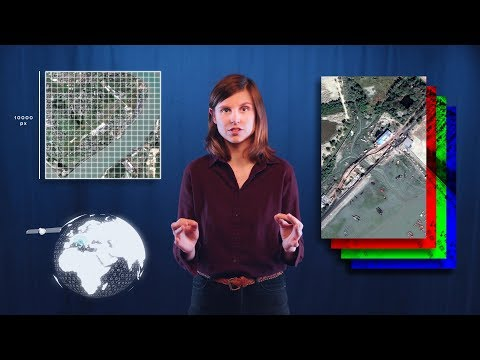

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('CQlLa_UWncg')

Video 2: Semantic segmentation of aerial (satellite) imagery using U-net (by DigitalSreeni)

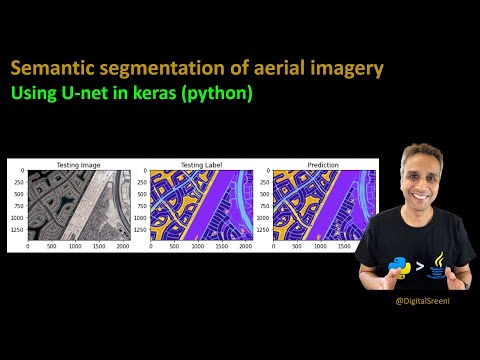

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('jvZm8REF2KY')

Video 3: PyTorch Image Segmentation Tutorial with U-NET: everything from scratch baby (by Aladdin Persson)

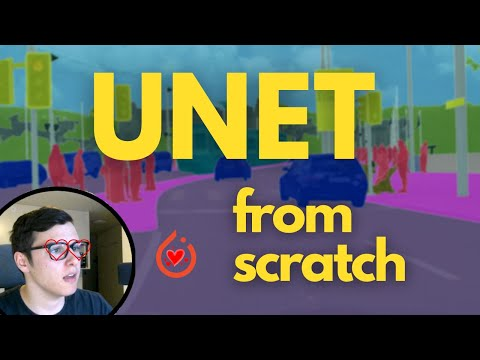

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('IHq1t7NxS8k')

## Reading materials
*Please include additional resources (e.g. research papers, blog posts, textbooks) for the readers to further study the topic of your tutorial.*

###Introductory articles


*   Rob Cole (2022): [A brief introduction to satellite image segmentation with neural networks](https://www.satellite-image-deep-learning.com/p/a-brief-introduction-to-satellite-365).
*   Vooban (2017): [Satellite Image Segmentation: a Workflow with U-Net](https://medium.com/vooban-ai/satellite-image-segmentation-a-workflow-with-u-net-7ff992b2a56e). 
*   Google Research (2019): [Mapping Africa’s Buildings with Satellite Imagery](https://ai.googleblog.com/2021/07/mapping-africas-buildings-with.html).
*   For an example of building segmentation, see Jhansi Anumula (2019): [Semantic Segmentation on Aerial Images using fastai](https://medium.com/swlh/semantic-segmentation-on-aerial-images-using-fastai-a2696e4db127).



###Datasets and tools

A large number of semantic segmentation datasets are available online, varying in spatial resolution, sensor modality and target class (vegetation, roads, building, etc). More recently, efforts have been made to collect relevant data resources in consolidated repositories.


*   Rob Cole's great [collection of resources and data sets](https://github.com/robmarkcole/satellite-image-deep-learning) of deep learning applied to satellite imagery, including [segmentation](https://github.com/robmarkcole/satellite-image-deep-learning#Segmentation)
*   [Awesome Semantic Segmentation](https://github.com/mrgloom/awesome-semantic-segmentation#satellite-images-segmentation)
* For a collection of annotated data sets, see [Awesome_Satellite_Benchmark_Datasets](https://github.com/Seyed-Ali-Ahmadi/Awesome_Satellite_Benchmark_Datasets) repository (search for 'SemSeg')
*   Google's [Open Buildings](https://sites.research.google/open-buildings/) dataset with building footprints in Africa and South East Asia
*   [MMSegmentation](https://github.com/open-mmlab/mmsegmentation) is an open source semantic segmentation toolbox with support for many remote sensing datasets


###Tutorials with code
*   Raoof Naushad (2020): [Image Semantic Segmentation of Satellite Imagery using U-Net](https://medium.com/dataseries/image-semantic-segmentation-of-satellite-imagery-using-u-net-e99ae13cf464). 
*   Deep Learning Berlin (2021): [Detecting Buildings in Satellite Images](https://deeplearning.berlin/satellite%20imagery/computer%20vision/fastai/2021/02/17/Building-Detection-SpaceNet7.html).
*   For an example of instance segmentation, see the [Building-Detection-MaskRCNN](https://github.com/Mstfakts/Building-Detection-MaskRCNN#3--from-theory-to-implementation) repository for building detection by using a Mask RCNN model architecture.

<a name="software-requirements"></a>
# Software Requirements
*Include in this section the software requirements, setup instructions, and library imports. *

This notebook requires Python >= 3.7. The following libraries are required:
*   Data manipulation: *pandas*, *numpy*
*   Data visualization: *matplotlib*
*   Geospatial data processing libraries: *geopandas*, *rasterio*
*   Deep learning architecture: *PyTorch* 
*   Image processing libraries: *shapely*, *patchify*, *cv2*, *PIL*, *imageio*
*   General helper modules: *json*, *urllib*, *xml.etree.ElementTree*, *io*, *zipfile*, *time*, *pathlib*, *os*



In [ ]:
# !pip install pandas numpy matplotlib torch geopandas rasterio shapely patchify cv2 PIL imageio json urllib xml.etree.ElementTree io zipfile time pathlib os

In [ ]:
import os

import rasterio
from rasterio.plot import reshape_as_image
from rasterio.plot import show
import rasterio.mask
from rasterio.features import rasterize

import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping, Point, Polygon
from shapely.ops import cascaded_union

import numpy as np
import cv2

from patchify import patchify
from PIL import Image

import json
import urllib

import xml.etree.ElementTree as ET
import shapely

from io import BytesIO
from zipfile import ZipFile
from imageio import imread
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.image import imread

import torch
from torch.utils.data import Dataset, DataLoader, sampler

rs = 42

<a name="data-description"></a>
# Data Description

In this section, kindly provide a brief description of the dataset that you will use in this tutorial. Specify information such as the data type or file format (e.g. text, image, video, tabular), size, spatial resolution, temporal resolution, labels or categories, etc. Explicitly name the source of your dataset. If you are introducing a new dataset, feel free to include additional information (e.g. field survey sampling methods, dataset annotation efforts, etc.) or provide external links and resources that discuss the specific details of the dataset.
 

## Data Download
Provide instructions on how to retrieve the necessary data. 

This may include bash scripts, Python scripts, or other means of downloading the data.

In [ ]:
# Insert data download code here, e.g.
# !wget <data-download-link>.zip -O data.zip

### Step 1: Download tile data

### Step 2: Retrieve shapefiles

*get_shapefile*:
- **Input**: bounding box values (only north and east, rest is inferred from tile size) as a tuple
- **Output**: geopandas dataframe with polygons of all buildings on the tile

## Data Preprocessing
Additionally, you can include any data preprocessing steps and exploratory data analyses (e.g. visualize data distributions, impute missing values, etc.) in this section to allow the users to better understand the dataset. 

In this section, you might also want to describe the different input and output variables, the train/val/test splits, and any data transformations.

In [ ]:
# Insert data pre-processing and exploratory data analysis
# code here. Feel free to break this up into several code
# cells, interleaved with explanatory text. 

### Step 3: Combine shapefile to polygon and generate mask

*generate_mask*:
- **Input**: geopandas dataframe and tile-image path
- **Output**: mask and image in 1000-1000 pixels

### Step 4: Patchify and save images and masks

*load_and_patchify*:
- **Input**: mask OR image, patch_size (**should correspond to input size for model**), path to output folder (e.g. masks or images), a string identifying each individual 1000-1000 tile (needs to be unique, otherwise output will be overwritten), number of channels (for masks: None, for images: 4)
- **Output**: saves individual images as png files into the specified output folder

#### Overview: Complete pipeline

1. *get_shapefile*:
- **Input**: bounding box values (only north and east, rest is inferred from tile size) as a tuple
- **Output**: geopandas dataframe with polygons of all buildings on the tile

2. *generate_mask*:
- **Input**: geopandas dataframe and tile-image path
- **Output**: mask and image in 1000-1000 pixels

3. *load_and_patchify*:
- **Input**: mask OR image, patch_size (**should correspond to input size for model**), path to output folder (e.g. masks or images), a string identifying each individual 1000-1000 tile (needs to be unique, otherwise output will be overwritten), number of channels (for masks: None, for images: 4)
- **Output**: saves individual images as png files into the specified output folder

#### Example: Image-mask pair

### Step 5: Removing patches with no visible buildings, and reducing the size of the dataset for proof of concept

Loading the tensors and displaying them as images

### Step 6: Using the data to instantiate a subclass of the Dataset class, and using it to create DataLoaders to pass to the model to train: Create train, validation and test datasets

<a name="modeltraintest"></a>
# Model Training and Testing

In this section, describe a step-by-step walkthrough of the methodology, in the form of code cells. Feel free to make use of markdown headings to break this section up into smaller subsections, preferrably one section per task. 

Reminders:
*   Split the code into small, digestible chunks. 
*   Use text cells to describe each code block.
*   Avoid duplicate code through modularization.
*   Focus on learning outcomes.

### Step 7: Defining the U-Net model

#### Option A: Defining the building blocks of the U-Net model separately

Below we define the basic building blocks of the UNet model separately, just to show how they work.
These functions are not used anywhere, but the same code is used in the UNet Class to define the layers.
You can skip the cells until the one saying The Full Model if required.

#### Option B: Defining the full U-Net model at once

### Step 8: Training the U-Net model

### Step 9: Testing the U-Net model using loss function

### Step 10: Running the model to generate a sample prediction

<a name="results-and-discussion"></a>
# Results & Discussion

In this section, describe and contextualize the results shown in the tutorial. Briefly describe the performance metrics and cross validation techniques used. 

In [ ]:
# Insert code here. Feel free to break this up into several code
# cells, interleaved with explanatory text.

Finally, include a discussion on the limitations and important takeaways from the exercise.

## Limitations
*   The tutorial is focused on education and learning. Explain all the simplifications you have made compared to applying a similar approach in the real world (for instance, if you have reduced your training data and performance).
*   ML algorithms and datasets can reinforce or reflect unfair biases. Reflect on the potential biases in the dataset and/or analysis presented in your tutorial, including its potential societal impact, and discuss how readers might go about addressing this challenge. 

## Next Steps
*   What do you recommend would be the next steps for your readers after finishing your tutorial?
*   Discuss other potential policy- and government-related applications for the method or tool discussed in the tutorial.
*   List anything else that you would want the reader to take away as they move on from the tutorial.

<a name="references"></a>
# References

Include all references used. 

For example, in this template:

*   EarthCube Notebook Template: https://github.com/earthcube/NotebookTemplates
*   Earth Engine Community Tutorials Style Guide: https://developers.google.com/earth-engine/tutorials/community/styleguide#colab
*   Google Cloud Community Tutorial Style Guide: https://cloud.google.com/community/tutorials/styleguide
*   Rule A, Birmingham A, Zuniga C, Altintas I, Huang S-C, Knight R, et al. (2019) Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks. PLoS Comput Biol 15(7): e1007007. https://doi.org/10.1371/journal.pcbi.1007007




## Acknowledgement

These guidelines are heavily based on the Climate Change AI template for the for the tutorials track at the [NeurIPS 2021 Workshop on Tackling Climate Change with Machine Learning](https://www.climatechange.ai/events/neurips2021). 